In [5]:
import pypower

In [6]:
#!pip install plotly

In [7]:
import pandas as pd
import numpy as np
#import plotly
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from pypower.api import case30pwl, case30Q 
from pypower.api import case30, ppoption, runpf, printpf, runopf, case24_ieee_rts, case14, case9
from pypower.loadcase import loadcase

from drawings import *
from utils import *
from pypower.api import opf_consfcn, opf_costfcn
from pypower.idx_bus import BUS_TYPE, REF, VM, VA, MU_VMAX, MU_VMIN, LAM_P, LAM_Q
from scipy.optimize import minimize, nnls, linprog

In [19]:
bus_cols, gen_cols, brch_cols, cost_cols = get_cols()

In [20]:
ppc = case30()
#ppopt = ppoption(PF_ALG=2)
ppopt = ppoption(PF_ALG=1, RETURN_RAW_DER=True, OPF_FLOW_LIM=1)

In [21]:
r = runpf(ppc, ppopt)

PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power flow converged in 3 iterations.

Converged in 0.04 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0         -95.0 to 405.9
Generators         6     On-line Capacity       335.0         -95.0 to 405.9
Committed Gens     6     Generation (actual)    191.6             100.4
Loads             20     Load                   189.2             107.2
  Fixed           20       Fixed                189.2             107.2
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          41     Losses (I^2 * Z)         2.44              8.99
Transformers       0     Branch 

In [22]:
pd.DataFrame(ppc['bus'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,3.0,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
1,2.0,2.0,21.7,12.7,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.10,0.95
2,3.0,1.0,2.4,1.2,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
3,4.0,1.0,7.6,1.6,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
4,5.0,1.0,0.0,0.0,0.0,0.19,1.0,1.0,0.0,135.0,1.0,1.05,0.95
5,6.0,1.0,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
6,7.0,1.0,22.8,10.9,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
7,8.0,1.0,30.0,30.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
8,9.0,1.0,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
9,10.0,1.0,5.8,2.0,0.0,0.00,3.0,1.0,0.0,135.0,1.0,1.05,0.95


In [23]:
pd.DataFrame(ppc['gen'])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,23.54,0.0,150.0,-20.0,1.0,100.0,1.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,60.97,0.0,60.0,-20.0,1.0,100.0,1.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22.0,21.59,0.0,62.5,-15.0,1.0,100.0,1.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.0,26.91,0.0,48.7,-15.0,1.0,100.0,1.0,55.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,19.20,0.0,40.0,-10.0,1.0,100.0,1.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,37.00,0.0,44.7,-15.0,1.0,100.0,1.0,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
pd.DataFrame(ppc['gencost'])

,0,1,2,3,4,5,6
0,2.0,0.0,0.0,3.0,0.02000,2.00,0.0
1,2.0,0.0,0.0,3.0,0.01750,1.75,0.0
2,2.0,0.0,0.0,3.0,0.06250,1.00,0.0
3,2.0,0.0,0.0,3.0,0.00834,3.25,0.0
4,2.0,0.0,0.0,3.0,0.02500,3.00,0.0
5,2.0,0.0,0.0,3.0,0.02500,3.00,0.0


In [25]:
from pandapower.plotting.plotly import simple_plotly
import pandapower.networks as pn
from pandapower import runpp
net = pn.case30()
runpp(net)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [26]:
#simple_plotly(net,line_width=1, bus_size=10, bus_color='blue', line_color='black')

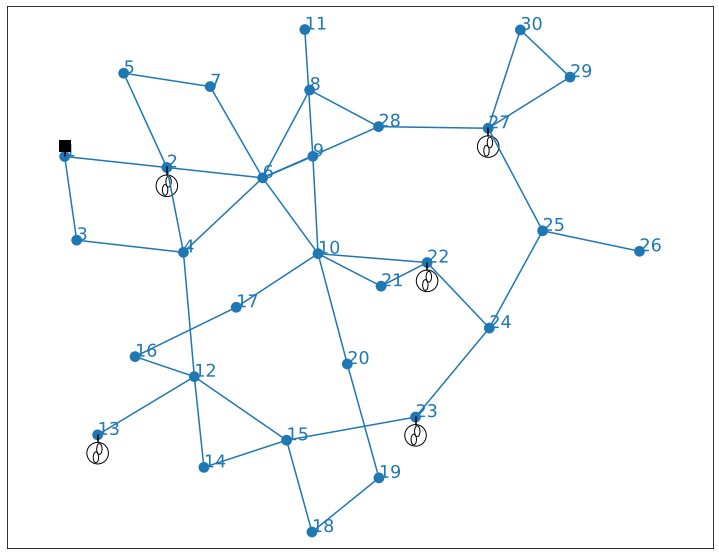

In [27]:
draw_net(net)

In [28]:
gens = ppc['gen'][:, 0]

load_list = []

for bus_str in ppc['bus']:
    tmp = np.zeros(21)
    if bus_str[0] in [7., 15., 30.]:
        if bus_str[0] not in gens:
            #print('load #%d' % bus_str[0])
            tmp[0] = bus_str[0]

            tmp[1] = -30.#bus_str[2]
            tmp[2] = -15.#bus_str[3]

            tmp[3] = -0.0001
            tmp[4] = -15.

            tmp[5] = bus_str[7]
            tmp[6] = 100.

            tmp[7] = 1.

            #fixed here
            tmp[8] = -0.0001
            tmp[9] = -30.

            bus_str[2], bus_str[3] = 0., 0.
            load_list.append(tmp)

ppc['gen'] = np.concatenate((ppc['gen'], np.array(load_list)))

In [29]:
pd.DataFrame(ppc['gen'])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,23.54,0.0,150.0000,-20.0,1.0,100.0,1.0,80.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,60.97,0.0,60.0000,-20.0,1.0,100.0,1.0,80.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22.0,21.59,0.0,62.5000,-15.0,1.0,100.0,1.0,50.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.0,26.91,0.0,48.7000,-15.0,1.0,100.0,1.0,55.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,19.20,0.0,40.0000,-10.0,1.0,100.0,1.0,30.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,37.00,0.0,44.7000,-15.0,1.0,100.0,1.0,40.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,-30.00,-15.0,-0.0001,-15.0,1.0,100.0,1.0,-0.0001,-30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,15.0,-30.00,-15.0,-0.0001,-15.0,1.0,100.0,1.0,-0.0001,-30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,30.0,-30.00,-15.0,-0.0001,-15.0,1.0,100.0,1.0,-0.0001,-30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from pypower.idx_bus import PD, QD, VM, VA, GS, BUS_TYPE, PQ, REF
from pypower.idx_brch import PF, PT, QF, QT
from pypower.idx_gen import PG, QG, VG, QMAX, QMIN, GEN_BUS, GEN_STATUS
from numpy import r_, c_, ix_, zeros, pi, ones, exp, argmax
from pypower.ext2int import ext2int

In [31]:
pd.DataFrame(ppc['branch'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,2.0,0.02,0.06,0.03,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
1,1.0,3.0,0.05,0.19,0.02,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
2,2.0,4.0,0.06,0.17,0.02,65.0,65.0,65.0,0.0,0.0,1.0,-360.0,360.0
3,3.0,4.0,0.01,0.04,0.00,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
4,2.0,5.0,0.05,0.20,0.02,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
5,2.0,6.0,0.06,0.18,0.02,65.0,65.0,65.0,0.0,0.0,1.0,-360.0,360.0
6,4.0,6.0,0.01,0.04,0.00,90.0,90.0,90.0,0.0,0.0,1.0,-360.0,360.0
7,5.0,7.0,0.05,0.12,0.01,70.0,70.0,70.0,0.0,0.0,1.0,-360.0,360.0
8,6.0,7.0,0.03,0.08,0.01,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
9,6.0,8.0,0.01,0.04,0.00,32.0,32.0,32.0,0.0,0.0,1.0,-360.0,360.0


In [32]:
alpha = 1.0
#bound max flow 3 <-> 11
ppc['branch'][14][5] *= alpha
#bound max flow 9 <-> 16
ppc['branch'][25][5] *= alpha
#bound max flow 27 <-> 26
#ppc['branch'][35][5] *= alpha
#bound max flow 18 <-> 19
#ppc['branch'][23][5] *= alpha
#bound max flow 22 <-> 23
ppc['branch'][31][5] *= alpha

In [33]:
pd.DataFrame(ppc['branch'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,2.0,0.02,0.06,0.03,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
1,1.0,3.0,0.05,0.19,0.02,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
2,2.0,4.0,0.06,0.17,0.02,65.0,65.0,65.0,0.0,0.0,1.0,-360.0,360.0
3,3.0,4.0,0.01,0.04,0.00,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
4,2.0,5.0,0.05,0.20,0.02,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
5,2.0,6.0,0.06,0.18,0.02,65.0,65.0,65.0,0.0,0.0,1.0,-360.0,360.0
6,4.0,6.0,0.01,0.04,0.00,90.0,90.0,90.0,0.0,0.0,1.0,-360.0,360.0
7,5.0,7.0,0.05,0.12,0.01,70.0,70.0,70.0,0.0,0.0,1.0,-360.0,360.0
8,6.0,7.0,0.03,0.08,0.01,130.0,130.0,130.0,0.0,0.0,1.0,-360.0,360.0
9,6.0,8.0,0.01,0.04,0.00,32.0,32.0,32.0,0.0,0.0,1.0,-360.0,360.0


In [34]:
ppc['gencost'][:,3] = np.ones(ppc['gencost'].shape[0]) * 2
ppc['gencost'] = ppc['gencost'][:,[0,1,2,3,5,6]]
pd.DataFrame(ppc['gencost'])

,0,1,2,3,4,5
0,2.0,0.0,0.0,2.0,2.00,0.0
1,2.0,0.0,0.0,2.0,1.75,0.0
2,2.0,0.0,0.0,2.0,1.00,0.0
3,2.0,0.0,0.0,2.0,3.25,0.0
4,2.0,0.0,0.0,2.0,3.00,0.0
5,2.0,0.0,0.0,2.0,3.00,0.0


In [35]:
cost_list = []

for load in load_list:
    cost_list.append(np.array([2., 0., 0., 2., -10., 0]))
    
ppc['gencost'] = np.concatenate((ppc['gencost'], np.array(cost_list)))

In [36]:
ppc['gencost'][-6: , 4] = 0.

In [37]:
pd.DataFrame(ppc['gen'])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,23.54,0.0,150.0000,-20.0,1.0,100.0,1.0,80.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,60.97,0.0,60.0000,-20.0,1.0,100.0,1.0,80.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22.0,21.59,0.0,62.5000,-15.0,1.0,100.0,1.0,50.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.0,26.91,0.0,48.7000,-15.0,1.0,100.0,1.0,55.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,19.20,0.0,40.0000,-10.0,1.0,100.0,1.0,30.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,37.00,0.0,44.7000,-15.0,1.0,100.0,1.0,40.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,-30.00,-15.0,-0.0001,-15.0,1.0,100.0,1.0,-0.0001,-30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,15.0,-30.00,-15.0,-0.0001,-15.0,1.0,100.0,1.0,-0.0001,-30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,30.0,-30.00,-15.0,-0.0001,-15.0,1.0,100.0,1.0,-0.0001,-30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
pd.DataFrame(ppc['gencost'])

,0,1,2,3,4,5
0,2.0,0.0,0.0,2.0,2.00,0.0
1,2.0,0.0,0.0,2.0,1.75,0.0
2,2.0,0.0,0.0,2.0,1.00,0.0
3,2.0,0.0,0.0,2.0,0.00,0.0
4,2.0,0.0,0.0,2.0,0.00,0.0
5,2.0,0.0,0.0,2.0,0.00,0.0
6,2.0,0.0,0.0,2.0,0.00,0.0
7,2.0,0.0,0.0,2.0,0.00,0.0
8,2.0,0.0,0.0,2.0,0.00,0.0


In [39]:
ppopt = ppoption(VERBOSE=0)
results = runopf(ppc, ppopt)


Converged in 0.91 seconds
Objective Function Value = 29.56 $/hr
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0        -140.0 to 405.9
Generators         9     On-line Capacity       335.0        -140.0 to 405.9
Committed Gens     9     Generation (actual)    150.3              90.7
Loads             17     Load                   147.6              91.9
  Fixed           17       Fixed                147.6              91.9
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          41     Losses (I^2 * Z)         2.71             15.98
Transformers       0     Branch Charging (inj)     -               16.9
Inter-ties         7     Total Inter-tie

In [40]:
ppc['gencost'][:,4][: 6] = 400
ppc['gencost'][:,4][6: ] = -100
ppc['gencost'][:,4][-2: ] = -10

ppc['gencost'][0, 4] = 15.
ppc['gencost'][1, 4] = 10.
ppc['gencost'][2, 4] = 10.
ppc['gencost'][3, 4] = 15.
ppc['gencost'][4, 4] = 50.
ppc['gencost'][5, 4] = 30.
ppc['gencost'][:,4:] *= 100.

pd.DataFrame(ppc['gencost'])

,0,1,2,3,4,5
0,2.0,0.0,0.0,2.0,1500.0,0.0
1,2.0,0.0,0.0,2.0,1000.0,0.0
2,2.0,0.0,0.0,2.0,1000.0,0.0
3,2.0,0.0,0.0,2.0,1500.0,0.0
4,2.0,0.0,0.0,2.0,5000.0,0.0
5,2.0,0.0,0.0,2.0,3000.0,0.0
6,2.0,0.0,0.0,2.0,-10000.0,0.0
7,2.0,0.0,0.0,2.0,-1000.0,0.0
8,2.0,0.0,0.0,2.0,-1000.0,0.0


In [41]:
results = runopf(ppc, ppopt)


Converged in 1.69 seconds
Objective Function Value = 190186.50 $/hr
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0        -140.0 to 405.9
Generators         9     On-line Capacity       335.0        -140.0 to 405.9
Committed Gens     9     Generation (actual)    150.4              90.6
Loads             17     Load                   147.6              91.9
  Fixed           17       Fixed                147.6              91.9
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          41     Losses (I^2 * Z)         2.81             14.07
Transformers       0     Branch Charging (inj)     -               15.2
Inter-ties         7     Total Inter

In [42]:
#draw_net(net)

In [43]:
pd.DataFrame(results['bus'], columns=bus_cols)

,BUS_I,BUS_TYPE,PD,QD,GS,BS,BUS_AREA,VM,VA,BASE_KV,ZONE,VMAX,VMIN,LAM_P,LAM_Q,MU_VMAX,MU_VMIN
0,1.0,3.0,0.0,0.0,0.0,0.00,1.0,0.977805,0.000000,135.0,1.0,1.05,0.95,1034.152584,-1.189810e-06,0.000000,0.0
1,2.0,2.0,21.7,12.7,0.0,0.00,1.0,0.971615,0.537346,135.0,1.0,1.10,0.95,1000.000005,-1.537068e+00,0.000000,0.0
2,3.0,1.0,2.4,1.2,0.0,0.00,1.0,0.977133,-1.243170,135.0,1.0,1.05,0.95,1135.896615,2.326159e+01,0.000000,0.0
3,4.0,1.0,7.6,1.6,0.0,0.00,1.0,0.977447,-1.448066,135.0,1.0,1.05,0.95,1156.567564,2.778422e+01,0.000000,0.0
4,5.0,1.0,0.0,0.0,0.0,0.19,1.0,0.969008,-0.365809,135.0,1.0,1.05,0.95,931.156018,-3.162824e+01,0.000000,0.0
5,6.0,1.0,0.0,0.0,0.0,0.00,1.0,0.972812,-1.465802,135.0,1.0,1.05,0.95,858.797946,-5.467355e+01,0.000000,0.0
6,7.0,1.0,0.0,0.0,0.0,0.00,1.0,0.964088,-0.870762,135.0,1.0,1.05,0.95,887.620534,-4.095649e+01,0.000000,0.0
7,8.0,1.0,30.0,30.0,0.0,0.00,1.0,0.961651,-1.922324,135.0,1.0,1.05,0.95,47475.038665,4.095466e+04,0.000000,0.0
8,9.0,1.0,0.0,0.0,0.0,0.00,1.0,0.992182,-2.051106,135.0,1.0,1.05,0.95,2954.232592,1.508192e+03,0.000000,0.0
9,10.0,1.0,5.8,2.0,0.0,0.00,3.0,1.002369,-2.348650,135.0,1.0,1.05,0.95,4031.591013,2.286188e+03,0.000000,0.0


In [44]:
ppc['gencost'][:,4][: 6] = 400
ppc['gencost'][:,4][6: ] = -10
ppc['gencost'][:,4][-2: ] = -100

ppc['gencost'][0, 4] = 5.
ppc['gencost'][1, 4] = 10.
ppc['gencost'][2, 4] = 10.
ppc['gencost'][3, 4] = 15.
ppc['gencost'][4, 4] = 50.
ppc['gencost'][5, 4] = 30.
ppc['gencost'][:,4:] *= 100.

pd.DataFrame(ppc['gencost'])

,0,1,2,3,4,5
0,2.0,0.0,0.0,2.0,500.0,0.0
1,2.0,0.0,0.0,2.0,1000.0,0.0
2,2.0,0.0,0.0,2.0,1000.0,0.0
3,2.0,0.0,0.0,2.0,1500.0,0.0
4,2.0,0.0,0.0,2.0,5000.0,0.0
5,2.0,0.0,0.0,2.0,3000.0,0.0
6,2.0,0.0,0.0,2.0,-1000.0,0.0
7,2.0,0.0,0.0,2.0,-10000.0,0.0
8,2.0,0.0,0.0,2.0,-10000.0,0.0


In [45]:
results = runopf(ppc, ppopt)


Converged in 1.64 seconds
Objective Function Value = 150022.06 $/hr
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0        -140.0 to 405.9
Generators         9     On-line Capacity       335.0        -140.0 to 405.9
Committed Gens     9     Generation (actual)    151.3              94.1
Loads             17     Load                   147.6              91.9
  Fixed           17       Fixed                147.6              91.9
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          41     Losses (I^2 * Z)         3.65             17.41
Transformers       0     Branch Charging (inj)     -               15.0
Inter-ties         7     Total Inter

In [46]:
ppc['gencost'][:,4][: 6] = 400
ppc['gencost'][:,4][6: ] = -10
ppc['gencost'][:,4][-2: ] = -100

ppc['gencost'][0, 4] = 15.
ppc['gencost'][1, 4] = 10.
ppc['gencost'][2, 4] = 10.
ppc['gencost'][3, 4] = 15.
ppc['gencost'][4, 4] = 5.
ppc['gencost'][5, 4] = 30.
ppc['gencost'][:,4:] *= 100.

pd.DataFrame(ppc['gencost'])

,0,1,2,3,4,5
0,2.0,0.0,0.0,2.0,1500.0,0.0
1,2.0,0.0,0.0,2.0,1000.0,0.0
2,2.0,0.0,0.0,2.0,1000.0,0.0
3,2.0,0.0,0.0,2.0,1500.0,0.0
4,2.0,0.0,0.0,2.0,500.0,0.0
5,2.0,0.0,0.0,2.0,3000.0,0.0
6,2.0,0.0,0.0,2.0,-1000.0,0.0
7,2.0,0.0,0.0,2.0,-10000.0,0.0
8,2.0,0.0,0.0,2.0,-10000.0,0.0


In [47]:
results = runopf(ppc, ppopt)


Converged in 1.19 seconds
Objective Function Value = 149811.04 $/hr
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0        -140.0 to 405.9
Generators         9     On-line Capacity       335.0        -140.0 to 405.9
Committed Gens     9     Generation (actual)    150.3              91.4
Loads             17     Load                   147.6              91.9
  Fixed           17       Fixed                147.6              91.9
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          41     Losses (I^2 * Z)         2.72             14.46
Transformers       0     Branch Charging (inj)     -               14.8
Inter-ties         7     Total Inter

In [48]:
ppc['gencost'][:,4][: 6] = 400
ppc['gencost'][:,4][6: ] = -10
ppc['gencost'][:,4][-2: ] = -100

ppc['gencost'][0, 4] = 15.
ppc['gencost'][1, 4] = 10.
ppc['gencost'][2, 4] = 10.
ppc['gencost'][3, 4] = 15.
ppc['gencost'][4, 4] = 50.
ppc['gencost'][5, 4] = 300.
ppc['gencost'][:,4:] *= 100.

pd.DataFrame(ppc['gencost'])

,0,1,2,3,4,5
0,2.0,0.0,0.0,2.0,1500.0,0.0
1,2.0,0.0,0.0,2.0,1000.0,0.0
2,2.0,0.0,0.0,2.0,1000.0,0.0
3,2.0,0.0,0.0,2.0,1500.0,0.0
4,2.0,0.0,0.0,2.0,5000.0,0.0
5,2.0,0.0,0.0,2.0,30000.0,0.0
6,2.0,0.0,0.0,2.0,-1000.0,0.0
7,2.0,0.0,0.0,2.0,-10000.0,0.0
8,2.0,0.0,0.0,2.0,-10000.0,0.0


In [49]:
results = runopf(ppc, ppopt)


Converged in 2.01 seconds
Objective Function Value = 192523.74 $/hr
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0        -140.0 to 405.9
Generators         9     On-line Capacity       335.0        -140.0 to 405.9
Committed Gens     9     Generation (actual)    150.6              91.4
Loads             17     Load                   147.6              91.9
  Fixed           17       Fixed                147.6              91.9
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          41     Losses (I^2 * Z)         3.00             14.84
Transformers       0     Branch Charging (inj)     -               15.1
Inter-ties         7     Total Inter

In [50]:
#alpha = 1.0

ppc['branch'][9][5] *= .5
ppc['branch'][23][5] *= .5
ppc['branch'][30][5] *= .5
ppc['branch'][33][5] *= .5
ppc['branch'][39][5] *= 2
ppc['branch'][9][5] *= 2

pd.DataFrame(ppc['branch'], columns = brch_cols)

,F_BUS,T_BUS,BR_R,BR_X,BR_B,RATE_A,RATE_B,RATE_C,TAP,SHIFT,...,ANGMIN,ANGMAX,PF,QF,PT,QT,MU_SF,MU_ST,MU_ANGMIN,MU_ANGMAX
0,1.0,2.0,0.02,0.06,0.03,130.0,130.0,130.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,0.05,0.19,0.02,130.0,130.0,130.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,4.0,0.06,0.17,0.02,65.0,65.0,65.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,4.0,0.01,0.04,0.00,130.0,130.0,130.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,5.0,0.05,0.20,0.02,130.0,130.0,130.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,6.0,0.06,0.18,0.02,65.0,65.0,65.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,6.0,0.01,0.04,0.00,90.0,90.0,90.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,7.0,0.05,0.12,0.01,70.0,70.0,70.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6.0,7.0,0.03,0.08,0.01,130.0,130.0,130.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,8.0,0.01,0.04,0.00,32.0,32.0,32.0,0.0,0.0,...,-360.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
ppc['gencost'][:,4][: 6] = 400
ppc['gencost'][:,4][6: ] = -100
ppc['gencost'][:,4][-2: ] = -10

ppc['gencost'][0, 4] = 15.
ppc['gencost'][1, 4] = 10.
ppc['gencost'][2, 4] = 10.
ppc['gencost'][3, 4] = 15.
ppc['gencost'][4, 4] = 50.
ppc['gencost'][5, 4] = 30.
ppc['gencost'][:,4:] *= 100.

pd.DataFrame(ppc['gencost'])

,0,1,2,3,4,5
0,2.0,0.0,0.0,2.0,1500.0,0.0
1,2.0,0.0,0.0,2.0,1000.0,0.0
2,2.0,0.0,0.0,2.0,1000.0,0.0
3,2.0,0.0,0.0,2.0,1500.0,0.0
4,2.0,0.0,0.0,2.0,5000.0,0.0
5,2.0,0.0,0.0,2.0,3000.0,0.0
6,2.0,0.0,0.0,2.0,-10000.0,0.0
7,2.0,0.0,0.0,2.0,-1000.0,0.0
8,2.0,0.0,0.0,2.0,-1000.0,0.0


In [52]:
results = runopf(ppc, ppopt)


Converged in 1.99 seconds
Objective Function Value = 190329.87 $/hr
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0        -140.0 to 405.9
Generators         9     On-line Capacity       335.0        -140.0 to 405.9
Committed Gens     9     Generation (actual)    150.4              90.4
Loads             17     Load                   147.6              91.9
  Fixed           17       Fixed                147.6              91.9
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          41     Losses (I^2 * Z)         2.77             13.94
Transformers       0     Branch Charging (inj)     -               15.2
Inter-ties         7     Total Inter

In [53]:
pd.DataFrame(results['bus'], columns=bus_cols)

#pd.DataFrame(ppc['bus'], columns = bus_cols)

,BUS_I,BUS_TYPE,PD,QD,GS,BS,BUS_AREA,VM,VA,BASE_KV,ZONE,VMAX,VMIN,LAM_P,LAM_Q,MU_VMAX,MU_VMIN
0,1.0,3.0,0.0,0.0,0.0,0.00,1.0,0.979446,0.000000,135.0,1.0,1.05,0.95,1034.150011,-1.162825e-06,0.000000,0.0
1,2.0,2.0,21.7,12.7,0.0,0.00,1.0,0.973165,0.536143,135.0,1.0,1.10,0.95,1000.000005,-1.619375e+00,0.000000,0.0
2,3.0,1.0,2.4,1.2,0.0,0.00,1.0,0.978643,-1.232785,135.0,1.0,1.05,0.95,1135.892130,2.378012e+01,0.000000,0.0
3,4.0,1.0,7.6,1.6,0.0,0.00,1.0,0.978927,-1.435718,135.0,1.0,1.05,0.95,1156.568414,2.841655e+01,0.000000,0.0
4,5.0,1.0,0.0,0.0,0.0,0.19,1.0,0.970507,-0.359128,135.0,1.0,1.05,0.95,931.046035,-3.202340e+01,0.000000,0.0
5,6.0,1.0,0.0,0.0,0.0,0.00,1.0,0.974246,-1.449768,135.0,1.0,1.05,0.95,858.483550,-5.534515e+01,0.000000,0.0
6,7.0,1.0,0.0,0.0,0.0,0.00,1.0,0.965562,-0.858895,135.0,1.0,1.05,0.95,887.383378,-4.153811e+01,0.000000,0.0
7,8.0,1.0,30.0,30.0,0.0,0.00,1.0,0.963074,-1.902535,135.0,1.0,1.05,0.95,47683.697477,4.143481e+04,0.000000,0.0
8,9.0,1.0,0.0,0.0,0.0,0.00,1.0,0.993811,-2.045696,135.0,1.0,1.05,0.95,2955.756508,1.529916e+03,0.000000,0.0
9,10.0,1.0,5.8,2.0,0.0,0.00,3.0,1.004101,-2.348563,135.0,1.0,1.05,0.95,4034.171672,2.318782e+03,0.000000,0.0


In [54]:
#draw_net(net)

In [55]:
pd.DataFrame(results['gen'], columns=gen_cols)

,GEN_BUS,PG,QG,QMAX,QMIN,VG,MBASE,GEN_STATUS,PMAX,PMIN,...,QC2MAX,RAMP_AGC,RAMP_10,RAMP_30,RAMP_Q,APF,MU_PMAX,MU_PMIN,MU_QMAX,MU_QMIN
0,1.0,9.187489e-08,9.177705,150.0000,-20.0,0.979446,100.0,1.0,80.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,465.849989,0.000000,0.000000
1,2.0,7.186763e+01,-19.999974,60.0000,-20.0,0.973165,100.0,1.0,80.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.619376
2,22.0,3.637507e+01,15.324059,62.5000,-15.0,1.017242,100.0,1.0,50.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,27.0,2.953236e+01,37.166414,48.7000,-15.0,1.071592,100.0,1.0,55.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,23.0,1.926749e-07,28.310753,40.0000,-10.0,1.061655,100.0,1.0,30.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,222.135526,0.000000,0.000000
5,13.0,1.259581e+01,44.700000,44.7000,-15.0,1.098104,100.0,1.0,40.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,950.053073,0.000000
6,7.0,-1.000039e-04,-14.999999,-0.0001,-15.0,0.965562,100.0,1.0,-0.0001,-30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10887.383379,0.000000,0.000000,41.538113
7,15.0,-1.000091e-04,-0.000100,-0.0001,-15.0,1.039011,100.0,1.0,-0.0001,-30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4716.872881,0.000000,834.112587,0.000000
8,30.0,-1.000173e-04,-9.261454,-0.0001,-15.0,1.036199,100.0,1.0,-0.0001,-30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2480.255908,0.000000,0.000000,0.000000


In [56]:
pd.DataFrame(ppc['bus'], columns=bus_cols)

,BUS_I,BUS_TYPE,PD,QD,GS,BS,BUS_AREA,VM,VA,BASE_KV,ZONE,VMAX,VMIN,LAM_P,LAM_Q,MU_VMAX,MU_VMIN
0,1.0,3.0,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95,0.0,0.0,0.0,0.0
1,2.0,2.0,21.7,12.7,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.10,0.95,0.0,0.0,0.0,0.0
2,3.0,1.0,2.4,1.2,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95,0.0,0.0,0.0,0.0
3,4.0,1.0,7.6,1.6,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95,0.0,0.0,0.0,0.0
4,5.0,1.0,0.0,0.0,0.0,0.19,1.0,1.0,0.0,135.0,1.0,1.05,0.95,0.0,0.0,0.0,0.0
5,6.0,1.0,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95,0.0,0.0,0.0,0.0
6,7.0,1.0,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95,0.0,0.0,0.0,0.0
7,8.0,1.0,30.0,30.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95,0.0,0.0,0.0,0.0
8,9.0,1.0,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95,0.0,0.0,0.0,0.0
9,10.0,1.0,5.8,2.0,0.0,0.00,3.0,1.0,0.0,135.0,1.0,1.05,0.95,0.0,0.0,0.0,0.0


In [57]:
help(pypower)

Help on package pypower:

NAME
    pypower - PYPOWER solves power flow and Optimal Power Flow (OPF) problems.

PACKAGE CONTENTS
    _compat
    add_userfcn
    api
    bustypes
    case118
    case14
    case24_ieee_rts
    case30
    case300
    case30Q
    case30pwl
    case39
    case4gs
    case57
    case6ww
    case9
    case9Q
    caseformat
    cplex_options
    custom_opf
    custom_opf_setup
    custom_runopf
    d2AIbr_dV2
    d2ASbr_dV2
    d2Ibr_dV2
    d2Sbr_dV2
    d2Sbus_dV2
    dAbr_dV
    dIbr_dV
    dSbr_dV
    dSbus_dV
    dcopf
    dcopf_solver
    dcpf
    e2i_data
    e2i_field
    ext2int
    fairmax
    fdpf
    gausspf
    get_reorder
    gurobi_options
    hasPQcap
    i2e_data
    i2e_field
    idx_area
    idx_brch
    idx_bus
    idx_cost
    idx_dcline
    idx_gen
    int2ext
    ipopt_options
    ipoptopf_solver
    isload
    loadcase
    main
    makeAang
    makeApq
    makeAvl
    makeAy
    makeB
    makeBdc
    makeLODF
    makePTDF
    makeSbus
  